In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 변경
plt.rcParams['axes.unicode_minus'] = False     # 마이너스부호 깨짐 방지

In [3]:
print('-'*50)

--------------------------------------------------


In [4]:
pd = pd.read_excel('assignment_data.xlsx')
pd

,시도,행정구역,학제,전체,전체.1,1학년,1학년.1,2학년,2학년.1,3학년,3학년.1,4학년,4학년.1,5학년,5학년.1,6학년,6학년.1
0,시도,행정구역,학제,전체,여자,전체,여자,전체,여자,전체,여자,전체,여자,전체,여자,전체,여자
1,서울,종로구,초등학교,3986,2019,567,292,616,311,654,315,726,368,710,362,713,371
2,서울,종로구,중학교,2402,1198,823,401,742,387,837,410,0,0,0,0,0,0
3,서울,종로구,고등학교,7183,3231,2372,1046,2335,1050,2476,1135,0,0,0,0,0,0
4,서울,종로구,(일반고),3240,1302,979,375,1042,422,1219,505,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,제주,서귀포시,고등학교,4247,2031,1396,690,1418,654,1433,687,0,0,0,0,0,0
1532,제주,서귀포시,(일반고),3263,1460,1051,482,1071,471,1141,507,0,0,0,0,0,0
1533,제주,서귀포시,(특성화고),675,262,241,104,242,78,192,80,0,0,0,0,0,0
1534,제주,서귀포시,(자율고),309,309,104,104,105,105,100,100,0,0,0,0,0,0


In [5]:
pd1 = pd.loc[pd.학제 == '초등학교',['시도','전체','1학년','2학년','3학년','4학년','5학년','6학년']]
result = pd1.groupby('시도')[['전체','1학년','2학년','3학년','4학년','5학년','6학년']].sum()
result = result.reset_index()
result

,시도,전체,1학년,2학년,3학년,4학년,5학년,6학년
0,강원,61372,8543,9210,10381,11093,10940,11205
1,경기,686938,96718,103339,117109,124915,122990,121867
2,경남,159140,20844,23315,26788,29237,29554,29402
3,경북,108628,14650,15992,18402,19916,19589,20079
4,광주,72944,10055,10803,12364,13118,13224,13380
5,대구,110567,15198,16654,19068,20036,19940,19671
6,대전,67171,9093,10105,11269,12272,12115,12317
7,부산,137882,18716,20751,23492,25419,24913,24591
8,서울,340539,47607,50841,57570,61799,61103,61619
9,세종,30981,4426,4842,5305,5650,5424,5334


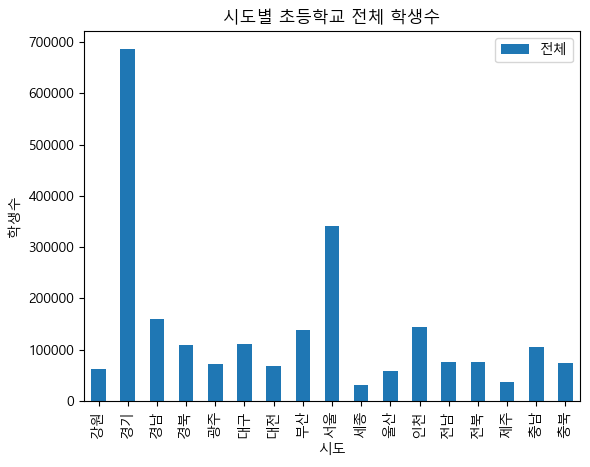

In [6]:
result.plot(kind='bar', x='시도', y='전체')
plt.xlabel('시도')
plt.ylabel('학생수')
plt.title('시도별 초등학교 전체 학생수')
plt.show()

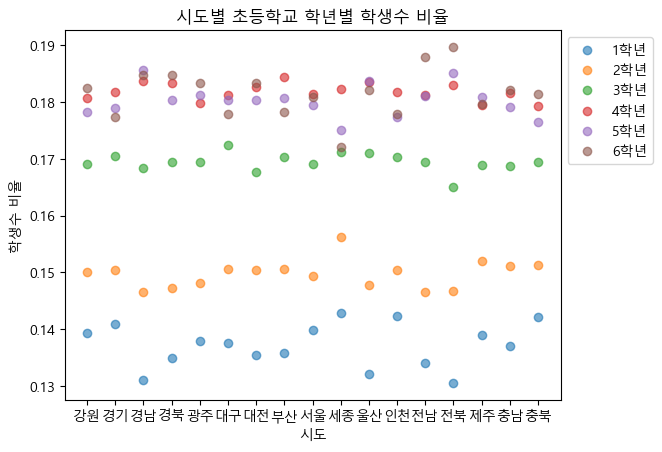

In [7]:
for col in ['1학년','2학년','3학년','4학년','5학년','6학년']:
    result[col] = result[col] / result['전체']

for col in ['1학년','2학년','3학년','4학년','5학년','6학년']:
    plt.scatter(result['시도'], result[col], label=col, alpha=0.6)
plt.xlabel('시도')
plt.ylabel('학생수 비율')
plt.legend()
plt.title('시도별 초등학교 학년별 학생수 비율')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [8]:
pd2 = pd.loc[pd.학제 == '중학교',['시도','전체','1학년','2학년','3학년']]
result = pd2.groupby('시도')[['전체','1학년','2학년','3학년']].sum()
result = result.reset_index()
result

,시도,전체,1학년,2학년,3학년
0,강원,37313,12592,12373,12348
1,경기,391970,134500,129477,127993
2,경남,96339,32695,32120,31524
3,경북,64338,22066,21416,20856
4,광주,43212,14654,14170,14388
5,대구,63675,21853,21054,20768
6,대전,39682,13336,13271,13075
7,부산,78993,27211,26156,25626
8,서울,199590,68033,65508,66049
9,세종,16609,5775,5455,5379


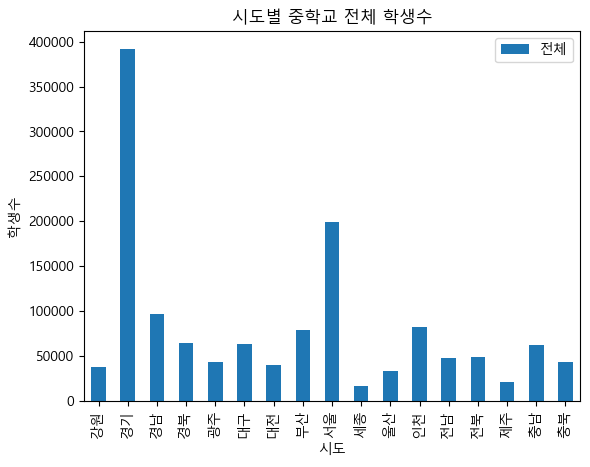

In [9]:
result.plot(kind='bar', x='시도', y='전체')
plt.xlabel('시도')
plt.ylabel('학생수')
plt.title('시도별 중학교 전체 학생수')
plt.show()

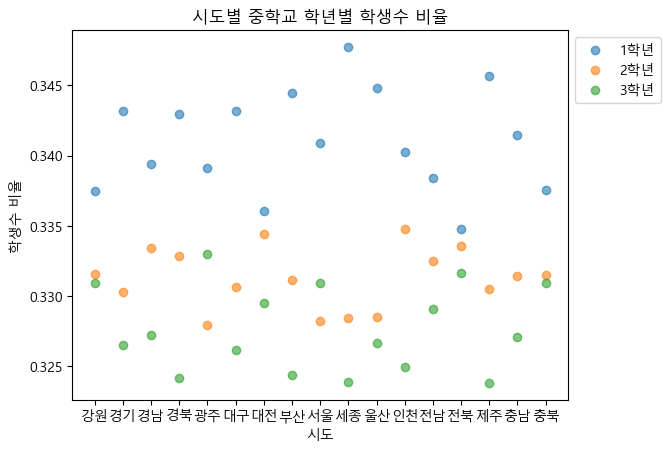

In [10]:
for col in ['1학년','2학년','3학년']:
    result[col] = result[col] / result['전체']

for col in ['1학년','2학년','3학년']:
    plt.scatter(result['시도'], result[col], label=col, alpha=0.6)
plt.xlabel('시도')
plt.ylabel('학생수 비율')
plt.legend()
plt.title('시도별 중학교 학년별 학생수 비율')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [11]:
pd3 = pd.loc[pd.학제 == '고등학교',['시도','전체','1학년','2학년','3학년']]
result = pd3.groupby('시도')[['전체','1학년','2학년','3학년']].sum()
result = result.reset_index()
result

,시도,전체,1학년,2학년,3학년
0,강원,36558,12030,11904,12624
1,경기,360932,118603,120024,122305
2,경남,89933,29327,29838,30768
3,경북,64076,21273,21220,21583
4,광주,41505,13519,13559,14427
5,대구,59533,19242,19689,20602
6,대전,38605,12383,12892,13330
7,부산,70832,23070,23459,24303
8,서울,203087,65411,67591,70085
9,세종,14342,4876,4927,4539


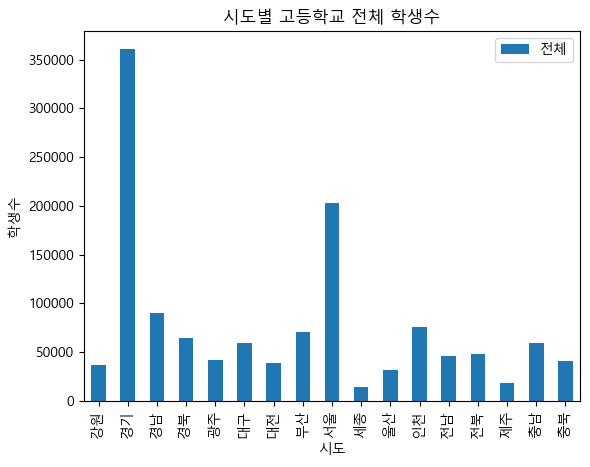

In [12]:
result.plot(kind='bar', x='시도', y='전체')
plt.xlabel('시도')
plt.ylabel('학생수')
plt.title('시도별 고등학교 전체 학생수')
plt.show()

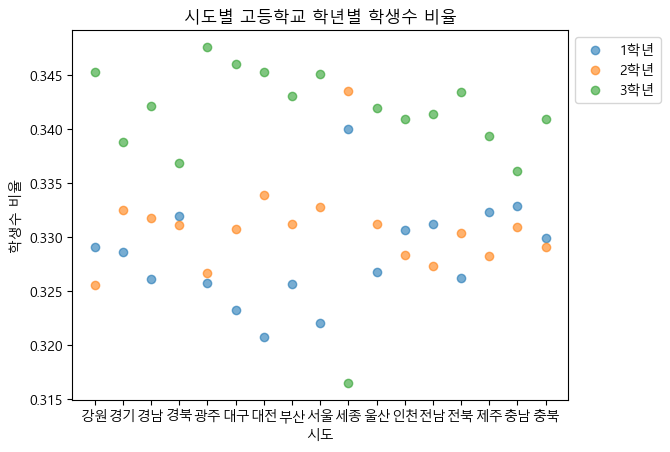

In [13]:
for col in ['1학년','2학년','3학년']:
    result[col] = result[col] / result['전체']

for col in ['1학년','2학년','3학년']:
    plt.scatter(result['시도'], result[col], label=col, alpha=0.6)
plt.xlabel('시도')
plt.ylabel('학생수 비율')
plt.legend()
plt.title('시도별 고등학교 학년별 학생수 비율')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()